<a href="https://colab.research.google.com/github/shriyapalkar/hands_on-data-science-projects/blob/main/Tik_Tok_Vibes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import nltk
from nltk.corpus import stopwords
import string
import re
nltk.download('stopwords')
stemmer=nltk.SnowballStemmer('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df=pd.read_csv('/content/tiktok_google_play_reviews.csv')
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,68ccaec8-1415-4301-a85e-3004679a3a83,Cassie Moore,https://play-lh.googleusercontent.com/a/ALm5wu...,No words,5.0,0.0,27.1.3,2022-11-29 21:55:37,NaN,NaN
1,d84cbfd3-6aa3-485c-aaf9-c5dca27dc966,Kaleb Plummer,https://play-lh.googleusercontent.com/a-/ACNPE...,Great fun app so far!,5.0,0.0,NaN,2022-11-29 21:55:04,NaN,NaN
2,96618aa1-31e5-4259-8649-89b75d962f00,Rylee Maher,https://play-lh.googleusercontent.com/a/ALm5wu...,The app would get a higher rating but I litera...,1.0,0.0,27.1.3,2022-11-29 21:54:48,NaN,NaN
3,078c0bda-598b-474e-a04e-d7cb3e6f6301,Kittykatelyn Romilly,https://play-lh.googleusercontent.com/a-/ACNPE...,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5.0,0.0,NaN,2022-11-29 21:54:35,NaN,NaN
4,8e68c5cd-b12a-4206-a8da-6bfdbff44ae3,Loveness Malenga,https://play-lh.googleusercontent.com/a-/ACNPE...,Pictures and record,5.0,0.0,NaN,2022-11-29 21:54:21,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
137787,3e53387a-27db-4a1f-af16-a421c6e3bc88,Sarah “Baby Girl Mama” Diesel,https://play-lh.googleusercontent.com/a-/ACNPE...,I love it 😍,5.0,0.0,26.3.4,2022-10-02 06:51:59,NaN,NaN
137788,eadf191b-63cf-4458-ae07-4f1a90824d99,Saikul Islam,https://play-lh.googleusercontent.com/a/ALm5wu...,Very bad update,5.0,0.0,26.2.3,2022-10-02 06:51:40,NaN,NaN
137789,c3cf7ba5-a1da-4824-99db-b949b5f8a4db,Asim Ali,https://play-lh.googleusercontent.com/a/ALm5wu...,🌚,1.0,0.0,26.2.41,2022-10-02 06:51:10,NaN,NaN
137790,ecc8a76e-ccb3-4977-a5e3-6cea978e8f40,Julia Muriithi,https://play-lh.googleusercontent.com/a-/ACNPE...,This app has started having bugs it's keeps lo...,1.0,0.0,26.4.3,2022-10-02 06:50:52,NaN,NaN


In [ ]:
#content & score
df = df[["content", "score"]]
(df.head())

,content,score
0,No words,5.0
1,Great fun app so far!,5.0
2,The app would get a higher rating but I litera...,1.0
3,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5.0
4,Pictures and record,5.0


In [ ]:
print(df.isnull().sum())

content    13
score       1
dtype: int64


In [ ]:
df = df.dropna()

In [ ]:
print(df.isnull().sum())

content    0
score      0
dtype: int64


In [ ]:
stopword=(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\n','',text)
    text = re.sub('\w*\d\w*','',text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]

    text=" ".join(text)
    return text
df["content"] = df["content"].apply(clean)

In [ ]:
ratings = df["score"].value_counts()
numbers = ratings.index
quantity = ratings.values
import plotly.express as px
figure = px.pie(df,
             values=quantity,
             names=numbers,hole = 0.5)
figure.show()

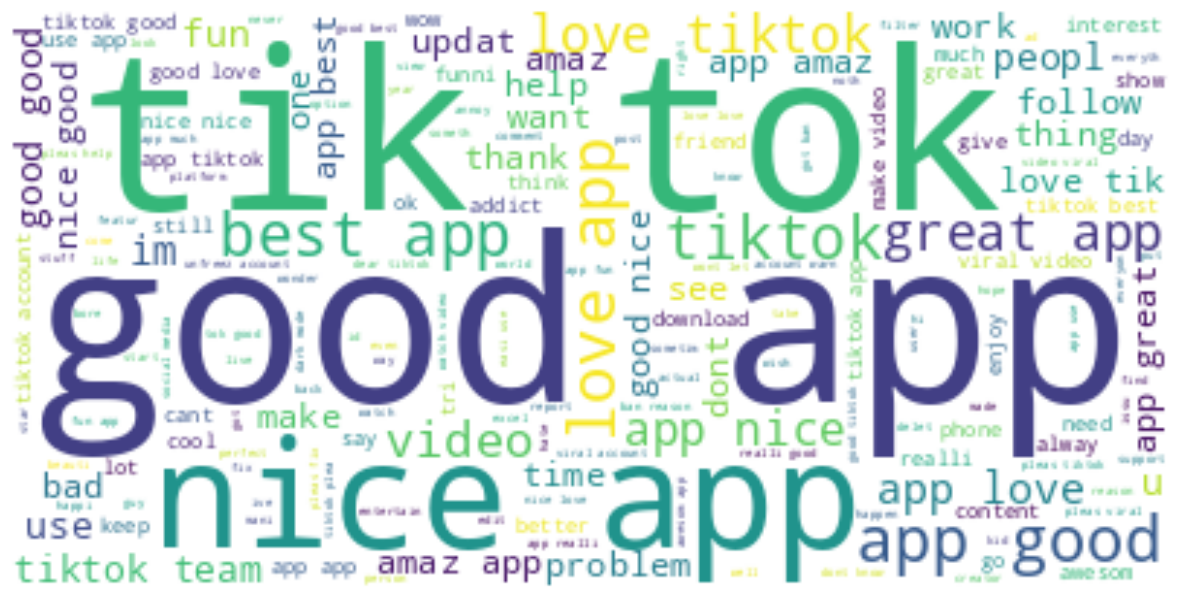

In [ ]:
text = " ".join(i for i in df.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
from nltk.sentiment.vader import SentimentIntensityAnalyzer
df['Positive']=[sentiments.polarity_scores(i)["pos"] for i in df["content"]]
df['Negative']=[sentiments.polarity_scores(i)["neg"] for i in df["content"]]
df['Neutral']=[sentiments.polarity_scores(i)["neu"] for i in df["content"]]
df=df[['content','Positive','Negative','Neutral']]
print(df.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                             content  Positive  Negative  \
0                                               word     0.000      0.00   
1                                  great fun app far     0.787      0.00   
2  app would get higher rate liter cant sign seco...     0.000      0.07   
3             wish could give  percent rate love 💕 😘     0.633      0.00   
4                                      pictur record     0.000      0.00   

   Neutral  
0    1.000  
1    0.213  
2    0.930  
3    0.367  
4    1.000  


In [ ]:
df['title_length'] = df['title'].apply(len) # Assumes 'title' column exists after data reloading


df['title_length'] = df['title'].apply(len)


fig = px.scatter(df[:100], x="title_length", y="imdb_score", title="Title Length vs. IMDb Score", trendline="ols")
fig.show()

KeyError: 'title'